<a href="https://colab.research.google.com/github/Aero-Kent-De-Guzman/VDA-CPE031-CPE21S4/blob/main/Exercise%209/Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Use the following csv file for this exercise**

In [ ]:
!pip install pandas
!pip install matplotlib

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Technological-Products-Sample-Data.csv to Technological-Products-Sample-Data.csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# **2. Read this file using Pandas or NumPy or using in-built matplotlib function.**

In [21]:
data = pd.read_csv("Technological-Products-Sample-Data.csv")
df = pd.DataFrame(data)
print(df.columns)

Index(['Brand', 'Device', 'Model', 'Country of Origin', 'Date of Release',
       'Price (USD)'],
      dtype='object')


# ***3. Analyze the data and generate the appropriate plot including its properties: ***


---


a. Read each device's date of release and sales. Show it using a line plot.

b. Get the total sales and show line plot with the following style properties
*   Line Style dotted and Line-color should be red
*   Show legend at the lower right location.
*   X label name = Year
*   Y label name = Sales
*   Add a circle marker.
*   Line marker color as red
*   Line width should be 3

c. Read all product sales data and show it using a multiline plot. Label them.

d. Read each brand sales data and show it using the bar chart. Label them.

e. Read each device and show it using the histogram to see the most common Country of Origin. Label them.

f. Create a pie chart that shows each brand Country of Origin. Label them.



## **A.**

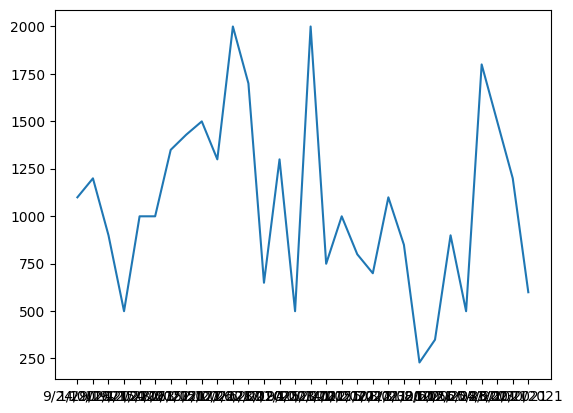

In [84]:
data = pd.read_csv("Technological-Products-Sample-Data.csv")
df = pd.DataFrame(data)

x1 = df["Date of Release"]
y1 = df["Price (USD)"]

plt.plot(x1, y1)
plt.show()

## **B.**

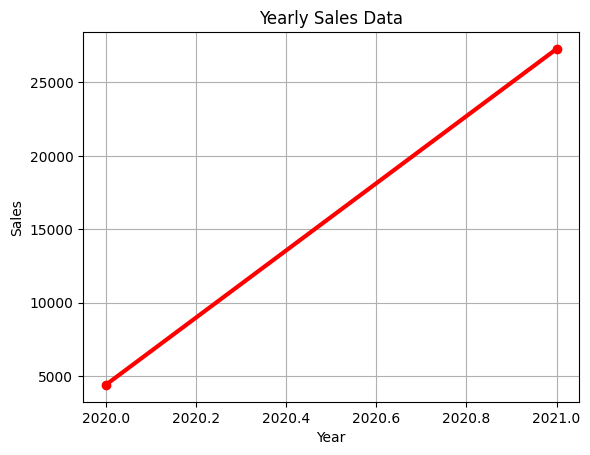

In [26]:
# To get the year from the date of release so that the x-axis will not be overly cluttered...
df["Date of Release"] = pd.to_datetime(df["Date of Release"])
df["year"] = df['Date of Release'].dt.year

yearly_sales = df.groupby('year')['Price (USD)'].sum()
x_axis_year = yearly_sales.index
y_axis_sales = yearly_sales.values

plt.plot(x_axis_year, y_axis_sales, marker='o', color='red', linewidth=3)
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly Sales Data")
plt.grid()
plt.show()

## **C.**

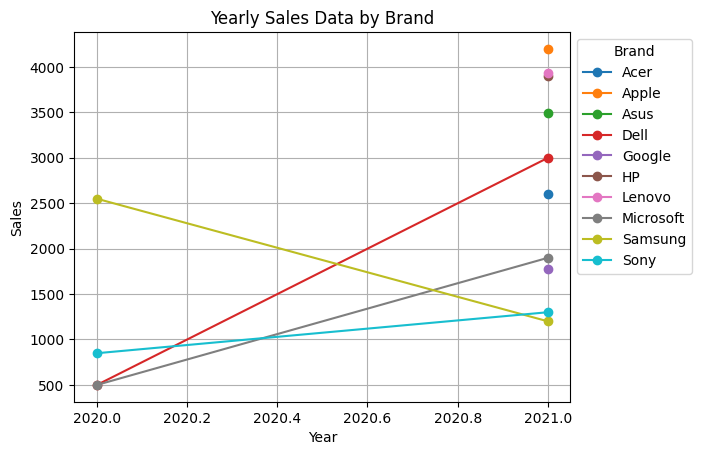

In [72]:
df["Date of Release"] = pd.to_datetime(df["Date of Release"])
df["year"] = df['Date of Release'].dt.year

yearly_sales = df.groupby(['year', 'Brand'])['Price (USD)'].sum().unstack()

for brand in yearly_sales.columns:
    plt.plot(yearly_sales.index, yearly_sales[brand], marker='o', label=brand)

plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("Yearly Sales Data by Brand")
plt.legend(title='Brand', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()

## **D.**

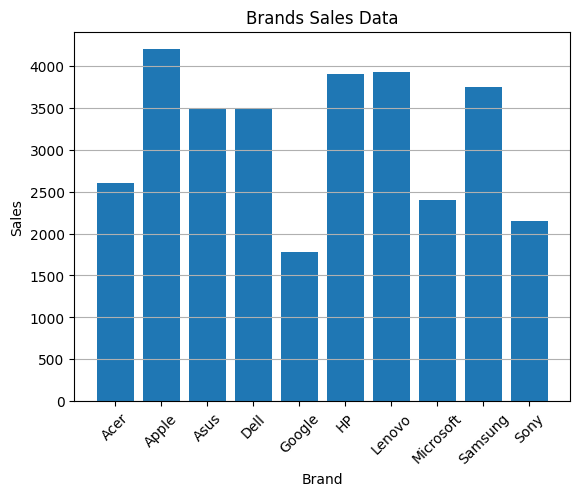

In [51]:
df["Date of Release"] = pd.to_datetime(df["Date of Release"])
brand_sales = df.groupby('Brand')['Price (USD)'].sum()
plt.bar(brand_sales.index, brand_sales.values)
plt.xlabel("Brand")
plt.ylabel("Sales")
plt.title("Brands Sales Data")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## **E.**

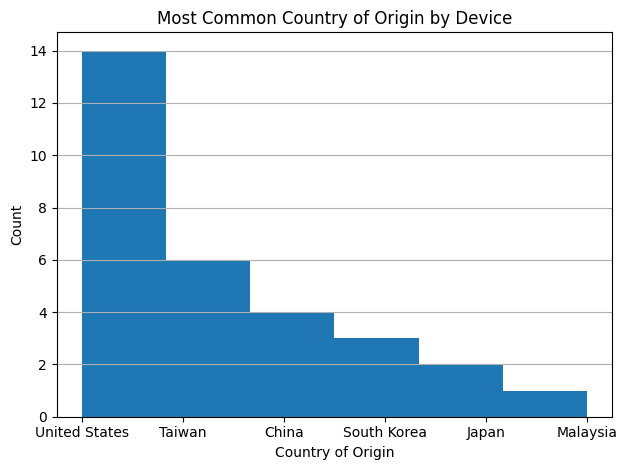

In [69]:
import numpy as np

country = np.arange(len(country_counts))
plt.hist(country, weights=country_counts.values, bins=len(country_counts))
plt.xticks(country, country_counts.index)

plt.xlabel("Country of Origin")
plt.ylabel("Count")
plt.title("Most Common Country of Origin by Device")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## **F**

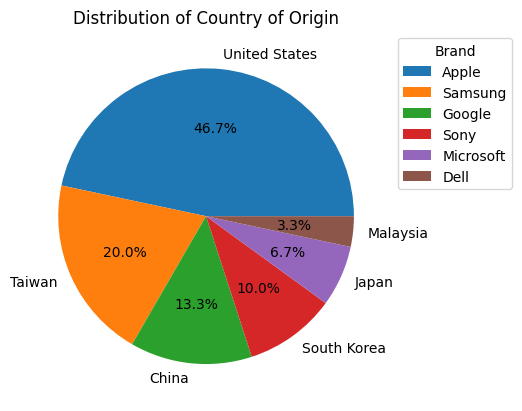

In [91]:
country_counts = df['Country of Origin'].value_counts()
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%')
plt.title("Distribution of Country of Origin")
brands = df['Brand']
plt.legend(brands, title='Brand', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()